<a href="https://colab.research.google.com/github/DCunoUCF/cap4630/blob/master/HW_2_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# David Cuno
# Professor Wocjan
# CAP 4630
# 11/12/19

# Problem 1
Come up with handcrafted features for the MNIST digit classificiation problem and use them in a simple model consisting of a single dense layer with softmax activation.

Let x be the matrix representing a image of a MNIST digit. Let vec(x) denote the flattened matrix x.

Your baseline model is the simple model that takes only vec(x) as input. The goal is to improve the accuracy of the simple model by augmenting the input vec(x) with hand-crafted features.

Say, f1, f2, ..., fm are your hand-crafted features. The augmented input vector is then obtained by stacking vec(x) and the vector (f1, f2, ..., fm). You can use the numpy command np.concatentate to stack vectors.

The features could be:

- width of digit (normalized to be in the range (0, 1)
- height of digit (normalized to be in the range (0, 1)
- number of white regions (a typical 8 has three, a typical 6 has two components, and 2 has 1), average intensity, etc.
- note the you can one-hot encode the number of connected components as follows: b1 = 1 iff num = 1, b2 = 1 if num = 2, b3 = 1 if num = 3, and b = 1 if num = 0 or num >= 4 (the latter case should normally not occur for well-formed digits); this is probably better than have just a single feature num / 3.

The problem of computing the number of independent white regions is a basic problem for job interviews. It boils down to computing connected components of the following graph. The vertices of the graph correspond to the pixels and are denoted by (i, j), which is the position of the pixel. Two vertices (i, j) and (i', j') are connected iff |i - i'| <= 1 and |j - j'| <= 1. If a pixel at position (i, j) is black, then remove it together with its edges.

You have to compute the number of connected components for the 60 thousand images. So make sure that your code is efficient.

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 25us/step - loss: 0.6036 - acc: 0.8491 - val_loss: 0.3423 - val_acc: 0.9075
Epoch 2/15
60000/60000 [==============================] - 1s 17us/step - loss: 0.3311 - acc: 0.9081 - val_loss: 0.3023 - val_acc: 0.9152
Epoch 3/15
60000/60000 [==============================] - 1s 17us/step - loss: 0.3018 - acc: 0.9159 - val_loss: 0.2880 - val_acc: 0.9195
Epoch 4/15
60000/60000 [==============================] - 1s 17us/step - loss: 0.2883 - acc: 0.9198 - val_loss: 0.2804 - val_acc: 0.9231
Epoch 5/15
60000/60000 [=======================

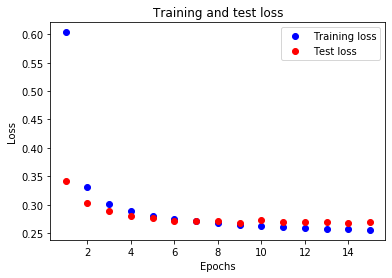

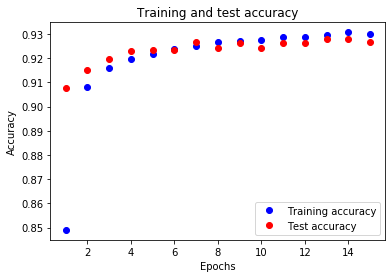

In [15]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import math as m
import time
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import to_categorical
from keras import models
from keras import layers

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

# concat_vec = []

# Height and Width
# for i in range(len(train_images)):
#   test_matrix = np.matrix(train_images[i])
#   # print(test_matrix)

#   test_matrix_flat = np.matrix.flatten(test_matrix)
#   # print(test_matrix_flat)

#   height_top = 28
#   height_bottom = 0
#   width_left = 28
#   width_right = 0

#   for j in range(test_matrix_flat.size):
#     if(test_matrix_flat[0,j] != 0):
#       height_top = min(m.floor(j/28), height_top)
#       height_bottom = max(m.floor(j/28), height_bottom)
#       width_left = min(j%28, width_left)
#       width_right = max(j%28, width_right)

#   height = (height_bottom - height_top) / 28
#   width = (width_right - width_left) / 28

#   concat_vec.append(height)
#   concat_vec.append(width)

network = models.Sequential() # couldn't figure out how to concat the features
network.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28,)))
network.summary()

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 15
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




In [0]:
# OLD CODE




# class Numbers:
# 	@staticmethod
# 	def build(width, height, depth, classes):
# 		# initialize the model
# 		model = Sequential()
# 		inputShape = (height, width, depth)
 
# 		# if we are using "channels first", update the input shape
# 		if K.image_data_format() == "channels_first":
# 			inputShape = (depth, height, width)

# white space
# i = i' and |j-j'| <= 1
# j = j' and |i-i'| <= 1

# height width
# np.argmax (argmax returns WHERE max is, max returns value of max)
# np.argmin

# start = time.time()

# for i in range(len(train_images)):
#   test_matrix = np.matrix(train_images[i])
#   # print(test_matrix)

#   test_matrix_flat = np.matrix.flatten(test_matrix)
#   # print(test_matrix_flat)

#   concat_vec = []

#   height_top = 28
#   height_bottom = 0
#   width_left = 28
#   width_right = 0

#   for j in range(test_matrix_flat.size):
#     if(test_matrix_flat[0,j] != 0):
#       height_top = min(m.floor(j/28), height_top)
#       height_bottom = max(m.floor(j/28), height_bottom)
#       width_left = min(j%28, width_left)
#       width_right = max(j%28, width_right)

#   # for j in range(test_matrix_flat.size):
#   #   if(test_matrix_flat[0,j] != 0):
#   #     height_top = np.argmin(test_matrix_flat[0,j])
#   #     height_bottom = np.argmax(test_matrix_flat[0,j])
#   #     width_left = np.argmin(test_matrix_flat[0,j])
#   #     width_right = np.argmax(test_matrix_flat[0,j])

#   height = (height_bottom - height_top) / 28
#   width = (width_right - width_left) / 28

#   concat_vec.append(height)
#   concat_vec.append(width)

#   graph = np.concatenate((test_matrix_flat, concat_vec),axis=0)

#   # print("Image Number:", i+1)
#   # print("Height:", height)
#   # print("Width:", width)

# end = time.time()

# print(end - start)

  #showing each image
  # plt.figure(figsize=(4, 4))
  # plt.imshow(train_images[i])
  # plt.show()